
<div style="text-align: center;">
    <h1>Araç Fiyat Tahmini</h1>
</div>


### Veri Seti Bilgileri:

Amerika'da farklı model yılları ve vites türü gibi özelliklerden oluşan, toplamda 13.109 arabadan oluşan bir veri seti üzerinde çalışıyoruz. Bu veri seti, her biri 7 değişken içeren bir yapıya sahip. Bu değişkenler arasında bağımlı değişken olarak fiyatı tahmin etmeye çalışacağız.

### Değişkenler:

- year:        Aracın model yılı
- price:       Aracın satış Fiyatı
- milage:      Aracın ne kadar mil yol aldığı bilgisi
- tax :        Aracın yıllık vergisi 
- transmission: Araç vites türü
- mpg :        Mil Başına kaç galon benzin tüketim
- engineSize : Aracın motor gücü

![apple]( https://resmim.net/cdn/2024/08/13/WIuCLT.jpg)

# 1. Bölüm: KEŞİFÇİ VERİ ANALİZİ(EDA)
- Veri Seti Okuma
- Veri Seti Kolon İsimleri
- Veri Seti Kolon İsimlerini Değiştirme
- Veri Setinin Tanımlayıcı istatistiklerinin Transpozu alınmış hali
- Veri Seti Tanımlayıcı İstatistiklerinin Tablo Halinde Verilmesi
- Veri Setinin Genel Resmi
- Veri Setinde Numerik ve Kategorik Değişkenlerin  Yakalanması 
- Kategorik değişkenlerin incelenmesi
- Numeric Değişkenlerin İncelenmesi
- Hedef Değişken Analizi
- Korelasyon Analizi

# 2. Bölüm: ÖZELLİK MÜHENDİSLİĞİ
- Aykırı Değer Analizi
- Eksik Değerler
- Label Encoding
- Özellik Ölçeklendirme(Scale)

# 3. Bölüm: MODELLERİN KURULUMU VE BAŞARILARI

## 1. BÖLÜM
## 1. KEŞİFÇİ VERİ ANALİZİ

### Gerekli Kütüphaneler

In [1]:
import numpy as np# çok boyutlu dizileri ve matrixleri hızlı şekilde kullanma
import pandas as pd # dataframe işlemleri için

import random #sayı üretmek, rastgele seçimler yapmak 

#######veri görselleştirme#########
import matplotlib.pyplot as plt
import seaborn as sns

#######başarı metrikleri için kullanılan kütüphane#########
from math import sqrt
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

#Hiperparameter optimizasyonu kütüphanesi
from sklearn.model_selection import GridSearchCV, cross_validate

#veri setini train şekilde ayırmak için kullandığımız kütüphane
from sklearn.model_selection import train_test_split

#Label_Encoder_islemi
from sklearn.preprocessing import LabelEncoder

#verileri belirli bir ölçekte ayarlamak için kütüphane
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


#Makine Öğrenmesi kütüphaneleri
import joblib #machine learning model kayıt.
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import GridSearchCV

### 1.1. Veri Seti okutma

In [2]:
df= pd.read_excel("merc.xlsx")
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [3]:
df.count()

year            13119
price           13119
transmission    13119
mileage         13119
tax             13119
mpg             13119
engineSize      13119
dtype: int64

### 1.2. Veri Seti Kolon İsimlerini Öğrenme

In [4]:
df.columns.to_list()#kolon isimleri

['year', 'price', 'transmission', 'mileage', 'tax', 'mpg', 'engineSize']

### 1.3. Veri Setindeki Kolon isimlerini Değiştirme

In [5]:
#değişken(kolon) ismi değiştirme


yeni_isimler = {
    'year': 'yıl',
    'price': 'satis_fiyati',
    'mileage': 'mil_miktari',
    'transmission':'vites_türü',
    'tax':'vergi',
    'mpg':'galon_basına_mil',
    'engineSize':'motor_gucu'
    }

df.rename(columns=yeni_isimler, inplace=True)
df.head()

,yıl,satis_fiyati,vites_türü,mil_miktari,vergi,galon_basına_mil,motor_gucu
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


### 1.4. Veri Setinin Tanımlayıcı istatistiklerinin Transpozu alınmış hali

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yıl,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
satis_fiyati,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mil_miktari,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
vergi,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
galon_basına_mil,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
motor_gucu,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


### 1.5. Veri Setinin Tanımlayıcı istatistiklerinin tablo halinde verilmiş hali

In [7]:
from tabulate import tabulate
betimsel_istatistikler = df.describe()
table = tabulate(betimsel_istatistikler, headers='keys', tablefmt='fancy_grid',numalign='center',stralign='center')
#table=tabulate(betimsel_istatistikler, headers=, tablefmt, numalign, stralign, missingval)
print(table)

╒═══════╤═════════╤════════════════╤═══════════════╤═════════╤════════════════════╤══════════════╕
│       │   yıl   │  satis_fiyati  │  mil_miktari  │  vergi  │  galon_basına_mil  │  motor_gucu  │
╞═══════╪═════════╪════════════════╪═══════════════╪═════════╪════════════════════╪══════════════╡
│ count │  13119  │     13119      │     13119     │  13119  │       13119        │    13119     │
├───────┼─────────┼────────────────┼───────────────┼─────────┼────────────────────┼──────────────┤
│ mean  │ 2017.3  │    24698.6     │    21949.6    │ 129.972 │      55.1558       │   2.07153    │
├───────┼─────────┼────────────────┼───────────────┼─────────┼────────────────────┼──────────────┤
│  std  │ 2.22471 │    11842.7     │    21176.5    │ 65.2603 │      15.2201       │   0.572426   │
├───────┼─────────┼────────────────┼───────────────┼─────────┼────────────────────┼──────────────┤
│  min  │  1970   │      650       │       1       │    0    │        1.1         │      0       │
├───────┼─

### 1.6. Veri Setinin Genel Resmi

In [8]:


def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape) # satır sütun sayısı.
    print("##################### Types #####################")
    print(dataframe.dtypes) # değişkenleri veri tipi
    print("##################### Head #####################")
    print(dataframe.head(head)) # veri setinde ilk 5 değişken
    print("##################### Tail #####################")
    print(dataframe.tail(head))  #veri setinde son 5 satır
    print("##################### NA #####################")
    print(dataframe.isnull().sum()) # Değişkenlerin boş satır sayısı.
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

df.head()
df.info()

##################### Shape #####################
(13119, 7)
##################### Types #####################
yıl                   int64
satis_fiyati          int64
vites_türü           object
mil_miktari           int64
vergi                 int64
galon_basına_mil    float64
motor_gucu          float64
dtype: object
##################### Head #####################
    yıl  satis_fiyati vites_türü  mil_miktari  vergi  galon_basına_mil  \
0  2005          5200  Automatic        63000    325              32.1   
1  2017         34948  Automatic        27000     20              61.4   
2  2016         49948  Automatic         6200    555              28.0   
3  2016         61948  Automatic        16000    325              30.4   
4  2016         73948  Automatic         4000    325              30.1   

   motor_gucu  
0         1.8  
1         2.1  
2         5.5  
3         4.0  
4         4.0  
##################### Tail #####################
        yıl  satis_fiyati vites_türü  mi

### 1.7. Veri Setinde Numerik ve Kategorik Değişkenlerin  Yakalanması 

In [9]:
##################################
# NUMERİK VE KATEGORİK DEĞİŞKENLERİN YAKALANMASI
##################################

#cat_th= bir numerik değişken ..'dan(aşağıdaki 10 olarak tanımladık örneğin) daha az eşsiz değere sahip ise buna kategorik değişken muamelesi yapıcak.
#car_th= bir kategorik değişken ..'dan aşağıdaki 20 olarak tanımladık örneğin)daha az eşsiz değere sahip ise buna numerik değişken muamelesi yapıcak.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)



Observations: 13119
Variables: 7
cat_cols: 1
num_cols: 6
cat_but_car: 0
num_but_cat: 0


Veri setinde toplam 7 değişken bulunmaktadır. Bu değişkenlerden biri kategorik, diğer 6'sı ise sayısal niteliktedir.

In [10]:
num_cols

['yıl',
 'satis_fiyati',
 'mil_miktari',
 'vergi',
 'galon_basına_mil',
 'motor_gucu']

<AxesSubplot:xlabel='satis_fiyati', ylabel='Density'>

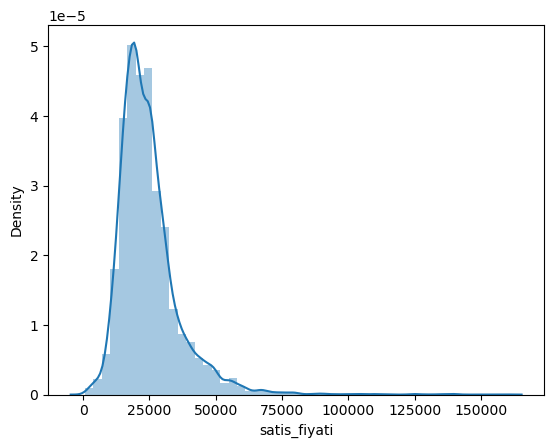

In [19]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sbn
sbn.distplot(df["satis_fiyati"])


<AxesSubplot:xlabel='yıl', ylabel='count'>

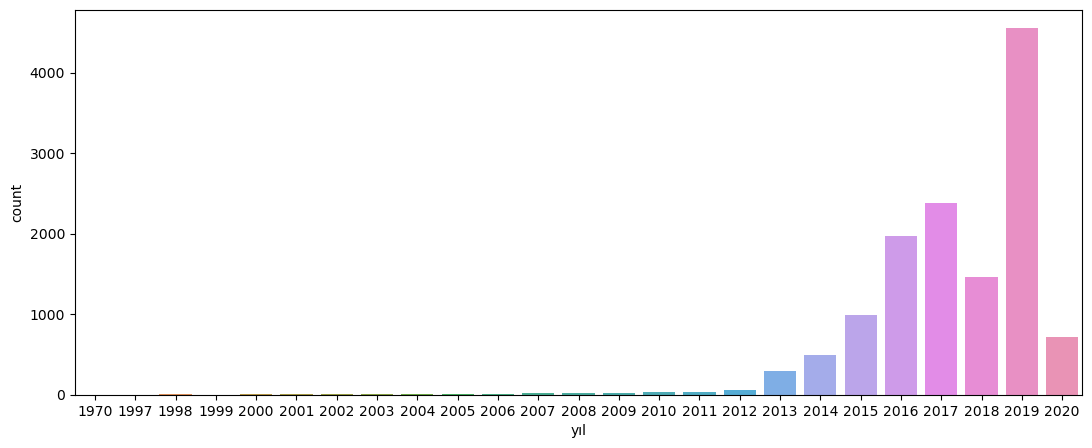

In [20]:
plt.figure(figsize=(13,5))

sbn.countplot(df["yıl"])

<AxesSubplot:xlabel='galon_basına_mil', ylabel='satis_fiyati'>

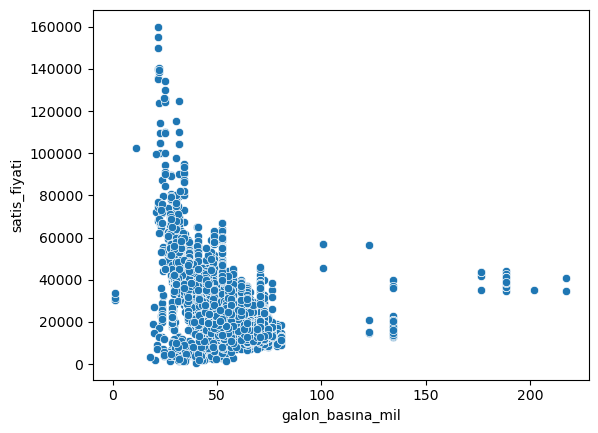

In [21]:
sbn.scatterplot(x="galon_basına_mil",y="satis_fiyati",data=df)

### 1.8. kategorik değişkenlerin incelenmesi

In [11]:
cat_cols

['vites_türü']

vites_türü değişkeni kategorik bir değişkendir.

#### 1.8.1. kategorik değişkenlerin dağılımı

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def cat_summary(dataframe, col_name, plot=True):
    pd.set_option('display.max_columns', None)  # Tüm sütunları göster
    pd.set_option('display.expand_frame_repr', False)  # Satırları yan yana göster

    summary_df = dataframe[col_name].value_counts().reset_index()
    summary_df.columns = [col_name, 'Count']
    summary_df['Ratio (%)'] = 100 * summary_df['Count'] / len(dataframe)
    print(summary_df)
    print("##########################################")

    if plot:
        plt.figure(figsize=(8, 4))  # Grafik boyutunu ayarla (width, height)
        sns.countplot(x=col_name, data=dataframe)
        plt.show(block=True)

  vites_türü  Count  Ratio (%)
0  Semi-Auto   6848  52.199101
1  Automatic   4825  36.778718
2     Manual   1444  11.006937
3      Other      2   0.015245
##########################################


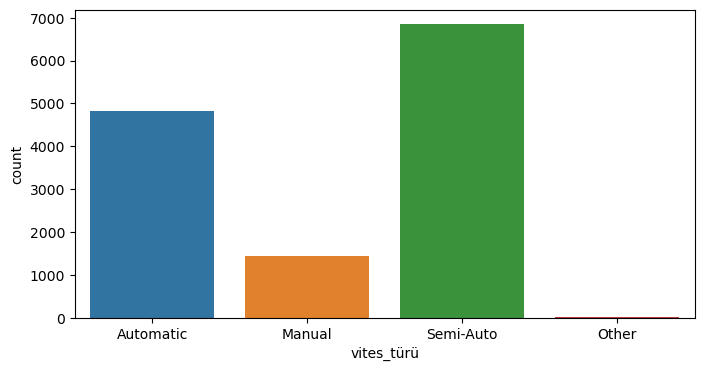

In [13]:
for col in cat_cols:
    cat_summary(df, col)

##### Değerlendirme: 
Vites türü değişkeninin kategorileri veri setinde eşit olarak dağılmamıştır. Bu durum, veri setinde yanlılık oluşturabilir.

### 1.9. Numeric Değişkenlerin incelenmesi

In [14]:
num_cols

['yıl',
 'satis_fiyati',
 'mil_miktari',
 'vergi',
 'galon_basına_mil',
 'motor_gucu']

#### 1.9.1.Numeric değişkenlerin dağılımı

In [15]:
#numeric değişkenlerin dağılımı
def num_summary(dataframe, numerical_col, plot=True):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    13119.000000
mean      2017.296288
std          2.224709
min       1970.000000
5%        2014.000000
10%       2015.000000
20%       2016.000000
30%       2016.000000
40%       2017.000000
50%       2018.000000
60%       2019.000000
70%       2019.000000
80%       2019.000000
90%       2019.000000
95%       2020.000000
99%       2020.000000
max       2020.000000
Name: yıl, dtype: float64


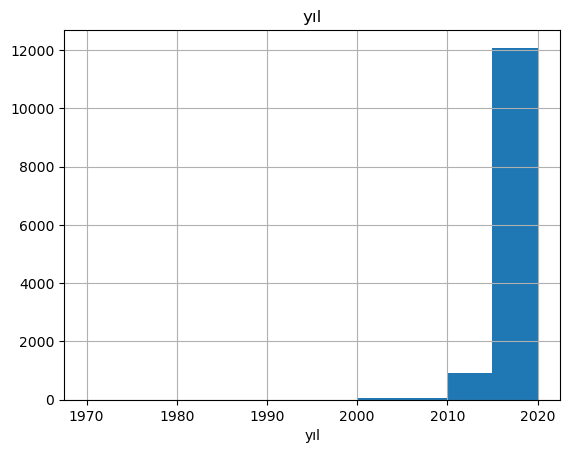

count     13119.000000
mean      24698.596920
std       11842.675542
min         650.000000
5%        11649.000000
10%       13868.400000
20%       16399.600000
30%       18449.000000
40%       20000.000000
50%       22480.000000
60%       24950.000000
70%       27000.000000
80%       30799.000000
90%       38000.000000
95%       46202.000000
99%       65990.000000
max      159999.000000
Name: satis_fiyati, dtype: float64


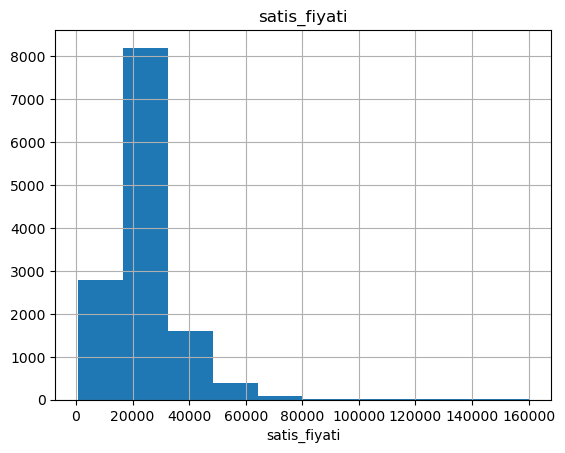

count     13119.000000
mean      21949.559037
std       21176.512267
min           1.000000
5%         1000.000000
10%        1987.000000
20%        4457.800000
30%        8069.400000
40%       11807.600000
50%       15189.000000
60%       21124.600000
70%       27939.800000
80%       36046.400000
90%       49277.400000
95%       62593.100000
99%       94804.220000
max      259000.000000
Name: mil_miktari, dtype: float64


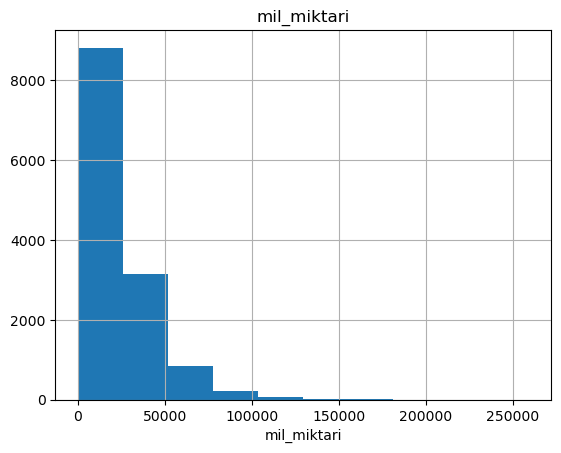

count    13119.000000
mean       129.972178
std         65.260286
min          0.000000
5%          20.000000
10%         20.000000
20%        125.000000
30%        145.000000
40%        145.000000
50%        145.000000
60%        145.000000
70%        145.000000
80%        145.000000
90%        150.000000
95%        200.000000
99%        325.000000
max        580.000000
Name: vergi, dtype: float64


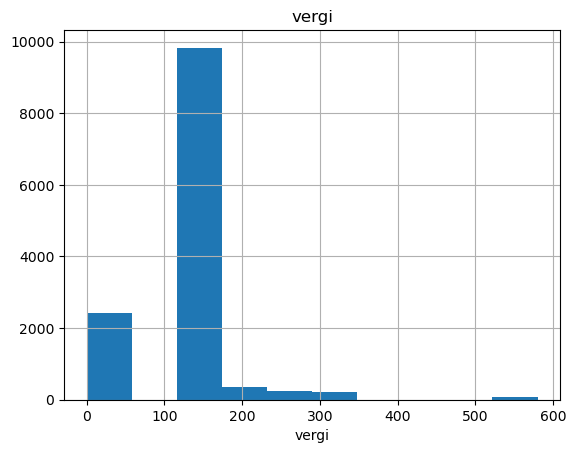

count    13119.000000
mean        55.155843
std         15.220082
min          1.100000
5%          31.700000
10%         36.700000
20%         44.100000
30%         47.100000
40%         52.300000
50%         56.500000
60%         58.900000
70%         64.200000
80%         65.700000
90%         68.900000
95%         72.400000
99%         80.700000
max        217.300000
Name: galon_basına_mil, dtype: float64


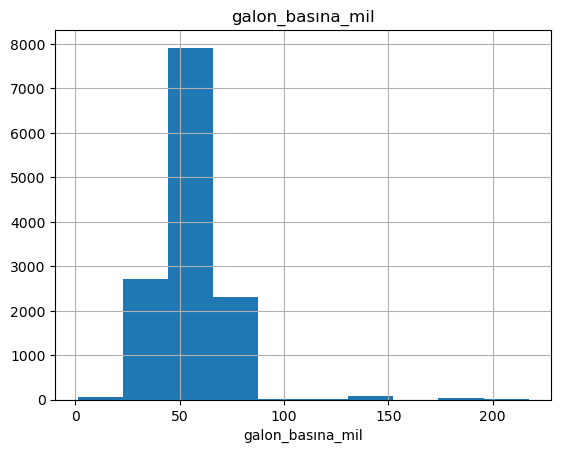

count    13119.000000
mean         2.071530
std          0.572426
min          0.000000
5%           1.300000
10%          1.500000
20%          1.600000
30%          2.000000
40%          2.000000
50%          2.000000
60%          2.100000
70%          2.100000
80%          2.100000
90%          3.000000
95%          3.000000
99%          4.000000
max          6.200000
Name: motor_gucu, dtype: float64


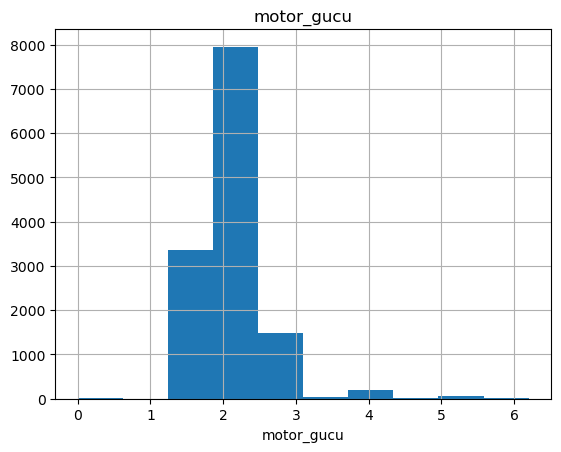

In [16]:
for col in num_cols:
    num_summary(df, col, plot=True)

### 1.10 Hedef Değişken Analizi

In [17]:
df["satis_fiyati"].value_counts()

24999    48
19999    46
17999    44
14999    42
19000    40
         ..
34795     1
57400     1
22678     1
42480     1
19344     1
Name: satis_fiyati, Length: 4424, dtype: int64


#### 10.1.1. Hedef Değişkenin Kategorik Değişkenler ile Analizi


In [18]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


In [19]:
for col in cat_cols:
    target_summary_with_cat(df, "satis_fiyati", col)

             TARGET_MEAN
vites_türü              
Automatic   24406.959585
Manual      15442.434903
Other       15847.500000
Semi-Auto   26858.461157




Arabaların vitesleri otomatik ve yarı otomatik olduğu durumda araba fiyatlarının artış eğiliminde olduğu gözlenmektedir.


#### 10.1.2. Hedef Değişkenin Numerik Değişkenler ile Analizi


In [20]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [21]:
for col in num_cols:
    target_summary_with_num(df, "satis_fiyati", col)



                 yıl
satis_fiyati        
650           2003.0
1350          2010.0
1490          2000.0
1495          2003.0
1695          2003.5
...              ...
139995        2018.0
140319        2019.0
149948        2011.0
154998        2020.0
159999        2020.0

[4424 rows x 1 columns]


              satis_fiyati
satis_fiyati              
650                  650.0
1350                1350.0
1490                1490.0
1495                1495.0
1695                1695.0
...                    ...
139995            139995.0
140319            140319.0
149948            149948.0
154998            154998.0
159999            159999.0

[4424 rows x 1 columns]


              mil_miktari
satis_fiyati             
650              109090.0
1350             116126.0
1490              87000.0
1495              66400.0
1695             130900.0
...                   ...
139995            13046.0
140319              785.0
149948             3000.0
154998             3000.0
159999    

### 1.11.Korelasyon analizi

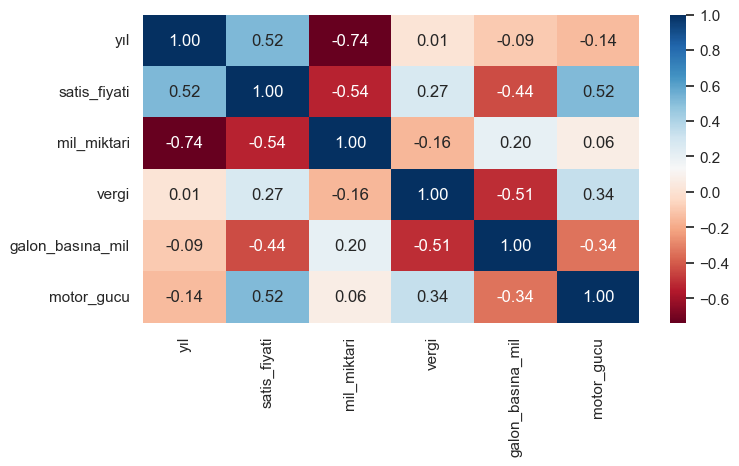

In [22]:

#num_cols = [col for col in df.columns if df[col].dtype in [int, float]]

corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (8, 4)})
sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")
plt.show()


##### Değerlendirme:
Veri setimizdeki bağımlı değişken olan satış fiyatının, bağımsız değişkenlerle ilişkisini incelediğimizde, yıl, vergi ve motor gücü değişkenleri arasında pozitif bir korelasyon görülmektedir. Yani, bu değişkenlerin değeri arttığında satış fiyatının da arttığı gözlemlenmiştir. Mil ve galon başına mil değişkenleri ile satış fiyatı arasında ise negatif bir korelasyon vardır. Bu değişkenlerin değeri arttığında, satış fiyatının düştüğü gözlemlenmiştir.

In [23]:
num_cols

['yıl',
 'satis_fiyati',
 'mil_miktari',
 'vergi',
 'galon_basına_mil',
 'motor_gucu']

####  1.11.1. Korelasyon Analizi Matris Tablosu

In [24]:
#korelasyon matrisi tablosu
cor_matrix = df.corr().abs()
cor_matrix

,yıl,satis_fiyati,mil_miktari,vergi,galon_basına_mil,motor_gucu
yıl,1.000000,0.520712,0.738027,0.012480,0.094626,0.142147
satis_fiyati,0.520712,1.000000,0.537214,0.268717,0.438445,0.516126
mil_miktari,0.738027,0.537214,1.000000,0.160223,0.202850,0.063652
vergi,0.012480,0.268717,0.160223,1.000000,0.513742,0.338341
galon_basına_mil,0.094626,0.438445,0.202850,0.513742,1.000000,0.339862
motor_gucu,0.142147,0.516126,0.063652,0.338341,0.339862,1.000000


#### 1.11.2. Korelasyon analizi matris tab 2

In [25]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
upper_triangle_matrix

,yıl,satis_fiyati,mil_miktari,vergi,galon_basına_mil,motor_gucu
yıl,NaN,0.520712,0.738027,0.012480,0.094626,0.142147
satis_fiyati,NaN,NaN,0.537214,0.268717,0.438445,0.516126
mil_miktari,NaN,NaN,NaN,0.160223,0.202850,0.063652
vergi,NaN,NaN,NaN,NaN,0.513742,0.338341
galon_basına_mil,NaN,NaN,NaN,NaN,NaN,0.339862
motor_gucu,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Bölüm

## 2. Feature Enginerring

### 2.1. Aykırı Değer Analizi

#### 2.1.1. Boxplot yöntemi(IQR Fonksiyonu tanımlama)

In [26]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

#### 2.1.2. IQR Alt ve Üst Limitlerini Belirleme

In [27]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


#### 2.1.3. Aykırı Değeri Olan Değişkenler

In [28]:
for col in num_cols:
    print(col, check_outlier(df, col))

yıl True
satis_fiyati True
mil_miktari True
vergi True
galon_basına_mil True
motor_gucu True


##### Tespit:
Yıl, satış fiyatı, mil miktarı, vergi, galon başına mil ve motor gücü değişkenlerinde aykırı değerler tespit edilmiştir.

#### 2.1.4. Baskılama yöntemi ile aykırı değer problemini Çözme

##### Bilgilendirme: 
Aykırı değerlerin bulunduğu değişkenlerdeki satırlar baskılama yöntemi ile düzeltilecektir.

In [29]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [30]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [31]:
for col in num_cols:
    print(col, check_outlier(df, col))

yıl False
satis_fiyati False
mil_miktari False
vergi False
galon_basına_mil False
motor_gucu False


##### Bilgilendirme: 
Aykırı değerlerin bulunduğu değişkenlerdeki satırlar baskılama yöntemi aykırı değer sorunu gidrelmiştir.

### 2.2. Eksik Değerler(Missing Value)

In [32]:
df.isnull().values.any()

False

In [33]:
df.isnull().sum().sum()# eksik veri sayısı

0

eksik verimiz yok.

### 2.3. Encoding

In [34]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


# cat_cols, num_cols, cat_but_car = grab_col_names(df)

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]


df=one_hot_encoder(df, ohe_cols)

### 2.4. Özellik Ölçeklendirme(Scale)

In [35]:
y = df["satis_fiyati"]
X = df.drop(["satis_fiyati"], axis=1)

In [36]:
scaler= RobustScaler()

df[X.columns.to_list()]=scaler.fit_transform(df[X.columns.to_list()])

In [37]:
y.head()

0     5200
1    34948
2    46275
3    46275
4    46275
Name: satis_fiyati, dtype: int64

In [38]:
df.head()

,satis_fiyati,mil_miktari,galon_basına_mil,motor_gucu,yıl_2012.0,yıl_2013.0,yıl_2014.0,yıl_2015.0,yıl_2016.0,yıl_2017.0,yıl_2018.0,yıl_2019.0,yıl_2020.0,vites_türü_Manual,vites_türü_Other,vites_türü_Semi-Auto,vergi_115,vergi_125,vergi_135,vergi_140,vergi_145,vergi_150,vergi_160,vergi_165,vergi_175
0,5200,1.861654,-1.311828,-0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0
1,34948,0.459894,0.263441,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
2,46275,-0.350012,-1.532258,1.833333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0
3,46275,0.031579,-1.403226,1.833333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0
4,46275,-0.435675,-1.419355,1.833333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0


In [39]:
df.count()

satis_fiyati            13119
mil_miktari             13119
galon_basına_mil        13119
motor_gucu              13119
yıl_2012.0              13119
yıl_2013.0              13119
yıl_2014.0              13119
yıl_2015.0              13119
yıl_2016.0              13119
yıl_2017.0              13119
yıl_2018.0              13119
yıl_2019.0              13119
yıl_2020.0              13119
vites_türü_Manual       13119
vites_türü_Other        13119
vites_türü_Semi-Auto    13119
vergi_115               13119
vergi_125               13119
vergi_135               13119
vergi_140               13119
vergi_145               13119
vergi_150               13119
vergi_160               13119
vergi_165               13119
vergi_175               13119
dtype: int64

## 3. BÖLÜM

## 3. MODELLERİN KURULUMU VE EĞİTİMİ

### 3.1. Eğitim - Validation - Test olarak ayrılması

In [40]:
from sklearn.model_selection import train_test_split

# Veri setini train ve test setlerine ayırma
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=17)

# Kalan veri setini validation ve test setlerine ayırma
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=17)


In [41]:
X_train.head()

,mil_miktari,galon_basına_mil,motor_gucu,yıl_2012.0,yıl_2013.0,yıl_2014.0,yıl_2015.0,yıl_2016.0,yıl_2017.0,yıl_2018.0,yıl_2019.0,yıl_2020.0,vites_türü_Manual,vites_türü_Other,vites_türü_Semi-Auto,vergi_115,vergi_125,vergi_135,vergi_140,vergi_145,vergi_150,vergi_160,vergi_165,vergi_175
1957,23811.0,61.4,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7521,3225.0,38.2,2.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5667,27292.0,56.5,2.1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3754,21067.0,68.9,2.1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1639,70302.5,54.3,2.1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [114]:
X_train.count()

mil_miktari             10495
galon_basına_mil        10495
motor_gucu              10495
yıl_2012.0              10495
yıl_2013.0              10495
yıl_2014.0              10495
yıl_2015.0              10495
yıl_2016.0              10495
yıl_2017.0              10495
yıl_2018.0              10495
yıl_2019.0              10495
yıl_2020.0              10495
vites_türü_Manual       10495
vites_türü_Other        10495
vites_türü_Semi-Auto    10495
vergi_115               10495
vergi_125               10495
vergi_135               10495
vergi_140               10495
vergi_145               10495
vergi_150               10495
vergi_160               10495
vergi_165               10495
vergi_175               10495
dtype: int64

In [115]:
X_test.count()

mil_miktari             1312
galon_basına_mil        1312
motor_gucu              1312
yıl_2012.0              1312
yıl_2013.0              1312
yıl_2014.0              1312
yıl_2015.0              1312
yıl_2016.0              1312
yıl_2017.0              1312
yıl_2018.0              1312
yıl_2019.0              1312
yıl_2020.0              1312
vites_türü_Manual       1312
vites_türü_Other        1312
vites_türü_Semi-Auto    1312
vergi_115               1312
vergi_125               1312
vergi_135               1312
vergi_140               1312
vergi_145               1312
vergi_150               1312
vergi_160               1312
vergi_165               1312
vergi_175               1312
dtype: int64

### 3.2. Base Modellerin kurulumu

In [146]:
import warnings
# Tüm uyarıları kapatmak için
warnings.filterwarnings("ignore")
from sklearn.linear_model import RANSACRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
def base_models_regression(X_train, y_train, scoring="neg_mean_squared_error"):
    print("Base Models for Regression....")
    regressors = [('Linear Regression', LinearRegression()),
                  ('Ridge Regression', Ridge(alpha=0.1)),
                  ('Lasso', Lasso()),
                  ('Elastic', ElasticNet()),
                  ('RidgeCV', RidgeCV()),
                  ('LassoCV', LassoCV()),
                  ('ElasticNetCV', ElasticNetCV()),
                  ("SVR", SVR(max_iter=100000)),
                  ("Linear SVR", LinearSVR(max_iter=10000)),
                  ("Decision Tree", DecisionTreeRegressor()),
                  ("Random Forest", RandomForestRegressor()),
                  ('Adaboost Regressor', AdaBoostRegressor()),
                  ('Gradient Boosting Regressor', GradientBoostingRegressor()),
                  ('XGBoost Regressor', XGBRegressor(use_label_encoder=False, eval_metric='logloss')),
                  ('LightGBM Regressor', LGBMRegressor()),
                  ('Polynomial Regression', PolynomialFeatures()),
                  ('KNN Regressor', KNeighborsRegressor()),
                  ('MLP Regressor', MLPRegressor(max_iter=1000)),
                  ('Passive Aggressive Regressor', PassiveAggressiveRegressor()),
                  ('Huber Regressor', HuberRegressor(max_iter=1000)),
                  ('SGD Regressor', SGDRegressor()),
                  ('Kernel Ridge Regression', KernelRidge()),
                  ('Gaussian Process Regression', GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel())),
                  ('Extra Trees Regressor', ExtraTreesRegressor()),
                  ('Bagging Regressor', BaggingRegressor()),
                  ('Extra Tree Regressor', ExtraTreeRegressor()),
                  ('RANSAC Regressor', RANSACRegressor()),
                  ('Quantile Regressor', GradientBoostingRegressor(loss='quantile')),
                  ('Gamma Regressor', GammaRegressor()),
                  ('Tweedie Regressor', TweedieRegressor()),
                  ('Poisson Regressor', PoissonRegressor())]

    for name, regressor in regressors:
        if isinstance(regressor, PolynomialFeatures):
            poly = PolynomialFeatures(degree=2)
            X_poly = poly.fit_transform(X)
            cv_results = cross_validate(LinearRegression(), X_poly, y, cv=3, scoring=scoring)
        elif isinstance(regressor, KNeighborsRegressor):
            cv_results = cross_validate(KNeighborsRegressor(), X, y, cv=3, scoring=scoring)
        else:
            cv_results = cross_validate(regressor, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(np.abs(cv_results['test_score'].mean()), 4)} ({name}) ")




In [ ]:
base_models_regression(X_train, y_train, scoring="neg_mean_squared_error")

Base Models for Regression....
neg_mean_squared_error: 18117767.7629 (Linear Regression) 
neg_mean_squared_error: 18134588.1252 (Ridge Regression) 
neg_mean_squared_error: 18191733.7824 (Lasso) 
neg_mean_squared_error: 34424674.6555 (Elastic) 
neg_mean_squared_error: 18177588.5359 (RidgeCV) 
neg_mean_squared_error: 52051800.1316 (LassoCV) 
neg_mean_squared_error: 52052481.0376 (ElasticNetCV) 
neg_mean_squared_error: 89553681.2497 (SVR) 
neg_mean_squared_error: 160348968.9223 (Linear SVR) 
neg_mean_squared_error: 15316787.8337 (Decision Tree) 
neg_mean_squared_error: 9095424.5268 (Random Forest) 
neg_mean_squared_error: 24411469.5144 (Adaboost Regressor) 
neg_mean_squared_error: 13524315.2222 (Gradient Boosting Regressor) 
neg_mean_squared_error: 8803754.0866 (XGBoost Regressor) 
neg_mean_squared_error: 8705527.3367 (LightGBM Regressor) 
neg_mean_squared_error: 50122965.5579 (Polynomial Regression) 
neg_mean_squared_error: 43960368.3964 (KNN Regressor) 
neg_mean_squared_error: 28543178.

### 3.3. Hiperparametre Optimizasyonu

In [123]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.tree import ExtraTreeRegressor

# Hiperparametre aralıklarını belirleme
ridge_params = {"alpha": [0.1, 1.0, 10.0]}  
lasso_params = {"alpha": [0.1, 1.0, 10.0]}  
elasticnet_params = {"alpha": [0.1, 1.0, 10.0], "l1_ratio": [0.1, 0.5, 0.9]}  
svr_params = {"C": [0.1, 1.0, 10.0], "epsilon": [0.1, 0.01]}  
decisiontree_params = {'max_depth': range(1, 20), "min_samples_split": range(2, 30)}  
randomforest_params = {"max_depth": [8, 15, None], "max_features": [5, 7, "auto"], "min_samples_split": [15, 20], "n_estimators": [200, 300]} 
adaboost_params = {"n_estimators": [50, 100, 200]} 
gradientboost_params = {"learning_rate": [0.05, 0.1, 0.2], "n_estimators": [50, 100, 200], "max_depth": [3, 4, 5]}  
xgboost_params = {"learning_rate": [0.1, 0.01], "max_depth": [5, 8], "n_estimators": [100, 200], "colsample_bytree": [0.5, 1]}  
lightgbm_params = {"learning_rate": [0.01, 0.1], "n_estimators": [300, 500], "colsample_bytree": [0.7, 1]}  
kneighbors_params = {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]} 
passiveaggressive_params = {"C": [0.1, 1.0, 10.0]}  
huber_params = {"epsilon": [1.1, 1.35]}  
sgd_params = {"alpha": [0.0001, 0.001, 0.01]}  
kernelridge_params = {"alpha": [0.1, 1.0, 10.0]}  
gaussianprocess_params = {"kernel": [DotProduct() + WhiteKernel()]}  
extratrees_params = {"n_estimators": [100, 200, 300], "max_features": ["auto", "sqrt", "log2"]} 
bagging_params = {"n_estimators": [10, 20, 30]} 
extratree_params = {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]}  
# Her bir model ve ilgili hiperparametre aralığını bir dizi içinde belirleme
regressors = [
    ("Ridge Regression", Ridge(), ridge_params),
    ("Lasso", Lasso(), lasso_params),
    ("ElasticNet", ElasticNet(), elasticnet_params),
    ("SVR", SVR(), svr_params),
    ("Linear SVR", LinearSVR(), svr_params),
    ("Decision Tree", DecisionTreeRegressor(), decisiontree_params),
    ("Random Forest", RandomForestRegressor(), randomforest_params),
    ("AdaBoost Regressor", AdaBoostRegressor(), adaboost_params),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(), gradientboost_params),
    ('XGBoost Regressor', XGBRegressor(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
    ('LightGBM Regressor', LGBMRegressor(), lightgbm_params),
    ("KNN Regressor", KNeighborsRegressor(), kneighbors_params),
    ("Passive Aggressive Regressor", PassiveAggressiveRegressor(), passiveaggressive_params),
    ("Huber Regressor", HuberRegressor(), huber_params),
    ("SGD Regressor", SGDRegressor(), sgd_params),
    ("Kernel Ridge Regression", KernelRidge(), kernelridge_params),
    ("Extra Trees Regressor", ExtraTreesRegressor(), extratrees_params),
    ("Bagging Regressor", BaggingRegressor(), bagging_params),
    ("Extra Tree Regressor", ExtraTreeRegressor(), extratree_params)
]

In [121]:
from sklearn.model_selection import GridSearchCV, cross_validate

def hyperparameter_optimization(X, y, cv=3, scoring="neg_mean_squared_error"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, regressor, params in regressors:
        print(f"########## {name} ##########")
        cv_results = cross_validate(regressor, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {abs(round(cv_results['test_score'].mean(), 4))}")

        gs_best = GridSearchCV(regressor, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = regressor.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {abs(round(cv_results['test_score'].mean(), 4))}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models


In [122]:
best_models=hyperparameter_optimization(X_train,y_train)

Hyperparameter Optimization....
########## Ridge Regression ##########
neg_mean_squared_error (Before): 17030474.441
neg_mean_squared_error (After): 17011751.5214
Ridge Regression best params: {'alpha': 0.1}

########## Lasso ##########
neg_mean_squared_error (Before): 17000619.6067
neg_mean_squared_error (After): 17000619.6067
Lasso best params: {'alpha': 1.0}

########## ElasticNet ##########
neg_mean_squared_error (Before): 33422818.967
neg_mean_squared_error (After): 20342396.8793
ElasticNet best params: {'alpha': 0.1, 'l1_ratio': 0.9}

########## SVR ##########
neg_mean_squared_error (Before): 80929355.304
neg_mean_squared_error (After): 59571403.8018
SVR best params: {'C': 10.0, 'epsilon': 0.01}

########## Linear SVR ##########
neg_mean_squared_error (Before): 5535645827.4265
neg_mean_squared_error (After): 13661195261.1155
Linear SVR best params: {'C': 10.0, 'epsilon': 0.01}

########## Decision Tree ##########
neg_mean_squared_error (Before): 13517328.1808
neg_mean_squared_err

### 3.4. En iyi Modellerin Karmasından Oluşturulan Model

In [148]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

def voting_regressor(best_models, X, y):
    print("Voting Regressor...")
    voting_reg = VotingRegressor(estimators=[('XGBoost Regressor', best_models["XGBoost Regressor"]),
                                             ('LightGBM Regressor', best_models["LightGBM Regressor"]),
                                              ('Gradient Boosting Regressor', best_models["Gradient Boosting Regressor"])],
                                 n_jobs=-1).fit(X, y)
    
    cv_results = cross_validate(voting_reg, X, y, cv=3, scoring="neg_mean_squared_error")
    
    neg_mse_mean = -cv_results['test_score'].mean()
    
    print(f"Negative Mean Squared Error: {neg_mse_mean}")
    
    return voting_reg

In [149]:
best_models

{'Ridge Regression': Ridge(alpha=0.1),
 'Lasso': Lasso(),
 'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.9),
 'SVR': SVR(C=10.0, epsilon=0.01),
 'Linear SVR': LinearSVR(C=10.0, epsilon=0.01),
 'Decision Tree': DecisionTreeRegressor(max_depth=16, min_samples_split=27),
 'Random Forest': RandomForestRegressor(min_samples_split=15, n_estimators=200),
 'AdaBoost Regressor': AdaBoostRegressor(n_estimators=100),
 'Gradient Boosting Regressor': GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200),
 'XGBoost Regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=No

In [150]:
voting_reg=voting_regressor(best_models,X_train,y_train)

Voting Regressor...
Negative Mean Squared Error: 6674945.317501019


### 3.5. En Başarılı Modelde Hata Oranı

In [47]:
train_pred=voting_reg.predict(X_train)
val_pred=voting_reg.predict(X_validation)
test_pred=voting_reg.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def calculate_rmse_mae_mse_for_custom_splits(y_true_train, y_pred_train, y_true_val, y_pred_val, y_true_test, y_pred_test):
    """
    Verilen gerçek ve tahmin edilen değerler için RMSE, MAE ve MSE hesaplar.

    Parameters:
    - y_true_train: Eğitim setindeki gerçek değerler
    - y_pred_train: Eğitim setindeki tahmin edilen değerler
    - y_true_val: Doğrulama setindeki gerçek değerler
    - y_pred_val: Doğrulama setindeki tahmin edilen değerler
    - y_true_test: Test setindeki gerçek değerler
    - y_pred_test: Test setindeki tahmin edilen değerler

    Returns:
    - train_rmse: Eğitim seti RMSE
    - val_rmse: Doğrulama seti RMSE
    - test_rmse: Test seti RMSE
    - train_mae: Eğitim seti MAE
    - val_mae: Doğrulama seti MAE
    - test_mae: Test seti MAE
    - train_mse: Eğitim seti MSE
    - val_mse: Doğrulama seti MSE
    - test_mse: Test seti MSE
    """

    # Eğitim setinde RMSE, MAE ve MSE hesapla
    train_rmse = sqrt(mean_squared_error(y_true_train, y_pred_train))
    train_mae = mean_absolute_error(y_true_train, y_pred_train)
    train_mse = mean_squared_error(y_true_train, y_pred_train)

    # Doğrulama setinde RMSE, MAE ve MSE hesapla
    val_rmse = sqrt(mean_squared_error(y_true_val, y_pred_val))
    val_mae = mean_absolute_error(y_true_val, y_pred_val)
    val_mse = mean_squared_error(y_true_val, y_pred_val)

    # Test setinde RMSE, MAE ve MSE hesapla
    test_rmse = sqrt(mean_squared_error(y_true_test, y_pred_test))
    test_mae = mean_absolute_error(y_true_test, y_pred_test)
    test_mse = mean_squared_error(y_true_test, y_pred_test)

    print(f"Train RMSE: {train_rmse}")
    print(f"Train MAE: {train_mae}")
    print(f"Train MSE: {train_mse}")
    print(f"Validation RMSE: {val_rmse}")
    print(f"Validation MAE: {val_mae}")
    print(f"Validation MSE: {val_mse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Test MAE: {test_mae}")
    print(f"Test MSE: {test_mse}")
    
    return train_rmse, val_rmse, test_rmse, train_mae, val_mae, test_mae, train_mse, val_mse, test_mse


In [49]:
calculate_rmse_mae_mse_for_custom_splits(y_train, train_pred,y_validation, val_pred, y_test, test_pred)

Train RMSE: 1882.548104269706
Train MAE: 1348.2638145854007
Train MSE: 3543987.364889464
Validation RMSE: 2537.4317888750884
Validation MAE: 1773.9044720896081
Validation MSE: 6438560.08319383
Test RMSE: 2371.07542224671
Test MAE: 1721.5016392229456
Test MSE: 5621998.657982414


(1882.548104269706,
 2537.4317888750884,
 2371.07542224671,
 1348.2638145854007,
 1773.9044720896081,
 1721.5016392229456,
 3543987.364889464,
 6438560.08319383,
 5621998.657982414)

### 3.6. Model Kayıt

In [154]:
joblib.dump(voting_reg,"voting_clf2.pkl")

['voting_clf2.pkl']

### 3.7. Model Çağırma

In [42]:
random_user = X.sample(1, random_state=45)
new_model = joblib.load("voting_clf2.pkl")
new_model.predict(random_user)


array([15624.64692925])

In [43]:
y_test

2636     23022
6157     27750
2008     29046
12064    17500
11632    29750
         ...  
841      28991
125      18790
2177     35420
11854    39490
12387    16400
Name: satis_fiyati, Length: 1312, dtype: int64

In [50]:
test_pred

array([24842.37102984, 27594.52463346, 29243.6566622 , ...,
       35550.9670912 , 35274.33689638, 21571.28032826])

In [158]:
test_pred_series = pd.Series(test_pred, name="tahmin")

# y_test ve test_pred verilerini bir DataFrame'de birleştirin
karsilastirma = pd.concat([y_test.reset_index(drop=True), test_pred_series.reset_index(drop=True)], axis=1)

# DataFrame'i gösterin
print(karsilastirma)

      satis_fiyati        tahmin
0            23022  24842.371030
1            27750  27594.524633
2            29046  29243.656662
3            17500  20976.482854
4            29750  27925.789613
...            ...           ...
1307         28991  29343.671808
1308         18790  20876.739404
1309         35420  35550.967091
1310         39490  35274.336896
1311         16400  21571.280328

[1312 rows x 2 columns]


In [51]:
test_pred_series = pd.Series(test_pred, index=y_test.index[:len(test_pred)], name="tahmin")

# y_test ve test_pred verilerini bir DataFrame'de birleştirin
karsilastirma = pd.DataFrame({"satis_fiyati": y_test, "tahmin": test_pred_series})

# DataFrame'i gösterin
print(karsilastirma)

       satis_fiyati        tahmin
2636          23022  24842.371030
6157          27750  27594.524633
2008          29046  29243.656662
12064         17500  20976.482854
11632         29750  27925.789613
...             ...           ...
841           28991  29343.671808
125           18790  20876.739404
2177          35420  35550.967091
11854         39490  35274.336896
12387         16400  21571.280328

[1312 rows x 2 columns]


In [52]:
karsilastirma

,satis_fiyati,tahmin
2636,23022,24842.371030
6157,27750,27594.524633
2008,29046,29243.656662
12064,17500,20976.482854
11632,29750,27925.789613
...,...,...
841,28991,29343.671808
125,18790,20876.739404
2177,35420,35550.967091
11854,39490,35274.336896


In [57]:
karsilastirma.reset_index(drop=True, inplace=True)

print(karsilastirma)

      satis_fiyati        tahmin         fark
0            23022  24842.371030  1820.371030
1            27750  27594.524633  -155.475367
2            29046  29243.656662   197.656662
3            17500  20976.482854  3476.482854
4            29750  27925.789613 -1824.210387
...            ...           ...          ...
1307         28991  29343.671808   352.671808
1308         18790  20876.739404  2086.739404
1309         35420  35550.967091   130.967091
1310         39490  35274.336896 -4215.663104
1311         16400  21571.280328  5171.280328

[1312 rows x 3 columns]


In [ ]:
plt.scatter(y_test,test_pred)
